In [1]:
%run ./resources/library.py

In [2]:
style_notebook()

# Notebook 3: Exploring TB and Socio-economic Indicators, Part 2

## Review Goals

Our goal for this TB exploration notebook is to construct a "gapminder" for TB data and a time series choropleth map. See figures below.

![Gapminder for TB](images/gapminder-for-tb.png)

**Figure 1**. Interactive Gapminder bubble chart for TB data

![Choropleth Timeseries for TB](images/choropleth-timeseries-tb.png)

**Figure 2**. Interactive choropleth map for TB data

## Steps in this notebook

Notebook 3
3. Merge, clean, explore dataframes
4. Generate plotly express visualizations

## STEP 1 (Review). Set up data exploration environment

To create visualizations, we will use Plotly Express. You can learn more about Plotly Express from:
1. [Plotly GitHub Site](https://github.com/plotly/plotly_express) (GitHub)
2. [Jupyter Notebook Example](https://www.plotly.express/)
3. Some articles written about it [here](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) and [here](https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c)

In [29]:
import plotly.express as px
import plotly

plotly.__version__

'4.2.1'

We will also use our Swiss Army knife for data science, `pandas`.

In [5]:
import pandas as pd
pd.__version__

'0.25.3'

In [6]:
pd.set_option('max_colwidth', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

**`missingno`**: Missing data visualization module for Python 

Read more about it here: https://github.com/ResidentMario/missingno

In [7]:
import missingno as mno
mno.__version__

'0.4.2'

In [8]:
%matplotlib inline

In [9]:
import numpy as np

np.__version__

'1.17.3'

## STEP 2. Download and clean up data

Since we have created all the necessary dataframes in Notebook 2 and pickled these, we will just load the pickle files here. All data pickle files are found in the `outputs` folder.

Load TB data:

In [10]:
tb_df2 = pd.read_pickle('outputs/tb_df2.pickle')
tb_dict_df = pd.read_pickle('outputs/tb_dict_df.pickle')

Load World Bank GDP, GDP per capita data, and country metadata:

In [11]:
wb_gdp_df5 = pd.read_pickle('outputs/wb_gdp_df5.pickle')
wb_gdppc_df5 = pd.read_pickle('outputs/wb_gdppc_df5.pickle')
wb_gdp_meta_df3 = pd.read_pickle('outputs/wb_gdp_meta_df3.pickle')

Load World Bank education data (literacy rate, primary completion rate) and indicator metadata:

In [12]:
wb_ed_df2 = pd.read_pickle('outputs/wb_ed_df2.pickle')
wb_edmeta_df1 = pd.read_pickle('outputs/wb_edmeta_df1.pickle')
wb_ed_primcomp_df4 = pd.read_pickle('outputs/wb_ed_primcomp_df4.pickle')

## STEP 3. Clean, merge, explore data sets

### GDP data

#### Merge #1: Merge WB GDP data and metadata dataframes on `ISO_Alpha`

In [13]:
merged_df1 = \
    pd.merge(wb_gdp_meta_df3, wb_gdp_df5, on=['ISO_Alpha'], how='inner').\
    drop(columns=['Country_y'])

merged_df1.head()

,ISO_Alpha,Region,IncomeGroup,Country_x,Year,GDP-USD
0,ABW,Latin America & Caribbean,High income,Aruba,1960,NaN
1,ABW,Latin America & Caribbean,High income,Aruba,1961,NaN
2,ABW,Latin America & Caribbean,High income,Aruba,1962,NaN
3,ABW,Latin America & Caribbean,High income,Aruba,1963,NaN
4,ABW,Latin America & Caribbean,High income,Aruba,1964,NaN


In [14]:
merged_df2 = merged_df1.rename(columns={'Country_x': 'Country'})

merged_df2.head()

,ISO_Alpha,Region,IncomeGroup,Country,Year,GDP-USD
0,ABW,Latin America & Caribbean,High income,Aruba,1960,NaN
1,ABW,Latin America & Caribbean,High income,Aruba,1961,NaN
2,ABW,Latin America & Caribbean,High income,Aruba,1962,NaN
3,ABW,Latin America & Caribbean,High income,Aruba,1963,NaN
4,ABW,Latin America & Caribbean,High income,Aruba,1964,NaN


#### Merge #2: Merge WB GDP and GDP per capita data

In [15]:
merged_df3 = \
    pd.merge(wb_gdppc_df5, merged_df2, on=['ISO_Alpha','Year'], how='inner').\
    drop(columns=['Country_y'])

merged_df3

,Country_x,ISO_Alpha,Year,GDP-PC-USD,Region,IncomeGroup,GDP-USD
0,Aruba,ABW,1960,NaN,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,1960,59.773194,South Asia,Low income,59.773194
2,Angola,AGO,1960,NaN,Sub-Saharan Africa,Lower middle income,NaN
3,Albania,ALB,1960,NaN,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,1960,NaN,Europe & Central Asia,High income,NaN
...,...,...,...,...,...,...,...
15512,Kosovo,XKX,2018,4281.292329,Europe & Central Asia,Upper middle income,4281.292329
15513,"Yemen, Rep.",YEM,2018,944.408499,Middle East & North Africa,Low income,944.408499
15514,South Africa,ZAF,2018,6339.574354,Sub-Saharan Africa,Upper middle income,6339.574354
15515,Zambia,ZMB,2018,1539.900158,Sub-Saharan Africa,Lower middle income,1539.900158


In [16]:
merged_df4 = merged_df3.rename(columns={'Country_x': 'Country'})

merged_df4

,Country,ISO_Alpha,Year,GDP-PC-USD,Region,IncomeGroup,GDP-USD
0,Aruba,ABW,1960,NaN,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,1960,59.773194,South Asia,Low income,59.773194
2,Angola,AGO,1960,NaN,Sub-Saharan Africa,Lower middle income,NaN
3,Albania,ALB,1960,NaN,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,1960,NaN,Europe & Central Asia,High income,NaN
...,...,...,...,...,...,...,...
15512,Kosovo,XKX,2018,4281.292329,Europe & Central Asia,Upper middle income,4281.292329
15513,"Yemen, Rep.",YEM,2018,944.408499,Middle East & North Africa,Low income,944.408499
15514,South Africa,ZAF,2018,6339.574354,Sub-Saharan Africa,Upper middle income,6339.574354
15515,Zambia,ZMB,2018,1539.900158,Sub-Saharan Africa,Lower middle income,1539.900158


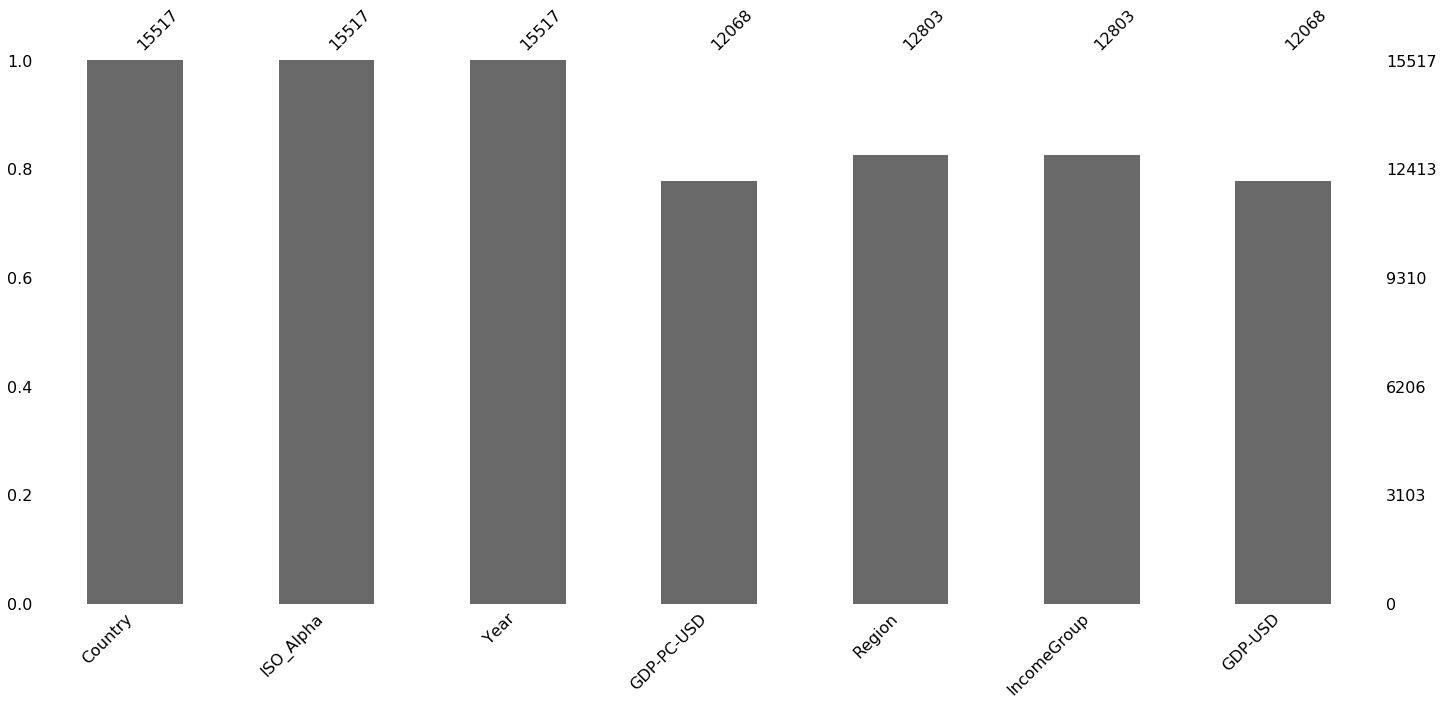

In [17]:
mno.bar(merged_df4)

In [18]:
tb_nonmatch = np.setdiff1d(tb_df2.ISO_Alpha.unique(), merged_df4.ISO_Alpha.unique())

tb_nonmatch

array(['AIA', 'ANT', 'BES', 'COK', 'MSR', 'NIU', 'SCG', 'TKL', 'WLF'],
      dtype=object)

It seems we have a few countries that did not match from the two dataframes. Let's take a closer look, and view the country names.

In [19]:
for iso3 in tb_nonmatch:
    print(iso3, tb_df2.query("ISO_Alpha=='"+iso3+"'")['Country'].unique())

AIA ['Anguilla']
ANT ['Netherlands Antilles']
BES ['Bonaire, Saint Eustatius and Saba']
COK ['Cook Islands']
MSR ['Montserrat']
NIU ['Niue']
SCG ['Serbia & Montenegro']
TKL ['Tokelau']
WLF ['Wallis and Futuna Islands']


Do you know where these countries are?

#### Merge #3: Merge WB GDP, GDP per capita and primary completion rate

In [20]:
merged_df5 = \
    pd.merge(wb_ed_primcomp_df4, merged_df4, on=['ISO_Alpha','Year'], how='inner').\
    drop(columns=['Country_y'])

merged_df5

,Country_x,ISO_Alpha,Year,Value,GDP-PC-USD,Region,IncomeGroup,GDP-USD
0,Aruba,ABW,1960,NaN,NaN,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,1960,NaN,59.773194,South Asia,Low income,59.773194
2,Angola,AGO,1960,NaN,NaN,Sub-Saharan Africa,Lower middle income,NaN
3,Albania,ALB,1960,NaN,NaN,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,1960,NaN,NaN,Europe & Central Asia,High income,NaN
...,...,...,...,...,...,...,...,...
15512,Kosovo,XKX,2018,NaN,4281.292329,Europe & Central Asia,Upper middle income,4281.292329
15513,"Yemen, Rep.",YEM,2018,NaN,944.408499,Middle East & North Africa,Low income,944.408499
15514,South Africa,ZAF,2018,NaN,6339.574354,Sub-Saharan Africa,Upper middle income,6339.574354
15515,Zambia,ZMB,2018,NaN,1539.900158,Sub-Saharan Africa,Lower middle income,1539.900158


In [21]:
merged_df6 = \
    merged_df5.rename(\
        columns={'Country_x': 'Country','Value':'Primary-Completion-Rate'})

merged_df6

,Country,ISO_Alpha,Year,Primary-Completion-Rate,GDP-PC-USD,Region,IncomeGroup,GDP-USD
0,Aruba,ABW,1960,NaN,NaN,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,1960,NaN,59.773194,South Asia,Low income,59.773194
2,Angola,AGO,1960,NaN,NaN,Sub-Saharan Africa,Lower middle income,NaN
3,Albania,ALB,1960,NaN,NaN,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,1960,NaN,NaN,Europe & Central Asia,High income,NaN
...,...,...,...,...,...,...,...,...
15512,Kosovo,XKX,2018,NaN,4281.292329,Europe & Central Asia,Upper middle income,4281.292329
15513,"Yemen, Rep.",YEM,2018,NaN,944.408499,Middle East & North Africa,Low income,944.408499
15514,South Africa,ZAF,2018,NaN,6339.574354,Sub-Saharan Africa,Upper middle income,6339.574354
15515,Zambia,ZMB,2018,NaN,1539.900158,Sub-Saharan Africa,Lower middle income,1539.900158


#### Merge #4: Merge TB data with WB GDP data

In [22]:
merged_df7 = pd.merge(merged_df6, tb_df2, on=['ISO_Alpha', 'Year'], how='inner')
merged_df8 = merged_df7.rename(columns={'Country_x': 'Country'})

merged_df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3719 entries, 0 to 3718
Data columns (total 53 columns):
Country                     3719 non-null object
ISO_Alpha                   3719 non-null object
Year                        3719 non-null int64
Primary-Completion-Rate     2229 non-null float64
GDP-PC-USD                  3566 non-null float64
Region                      3719 non-null object
IncomeGroup                 3719 non-null object
GDP-USD                     3566 non-null float64
Country_y                   3719 non-null object
iso2                        3701 non-null object
iso_numeric                 3719 non-null int64
g_whoregion                 3719 non-null object
e_pop_num                   3719 non-null int64
e_inc_100k                  3719 non-null float64
e_inc_100k_lo               3719 non-null float64
e_inc_100k_hi               3719 non-null float64
e_inc_num                   3719 non-null int64
e_inc_num_lo                3719 non-null int64
e_inc_num_

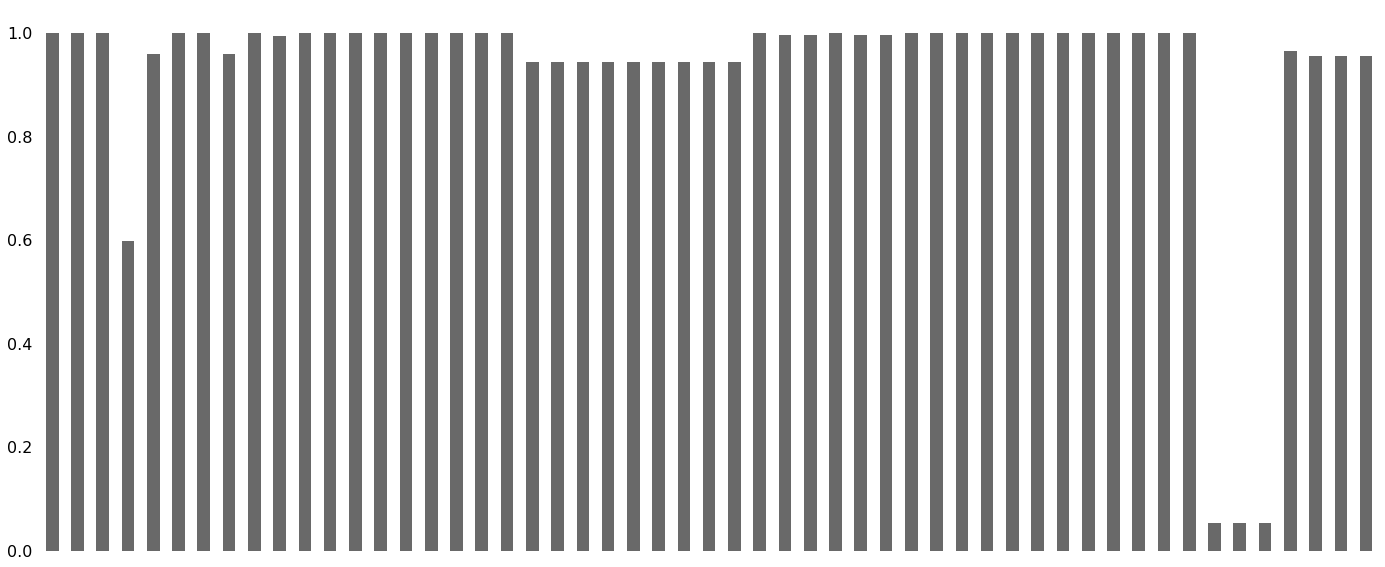

In [23]:
mno.bar(merged_df8)

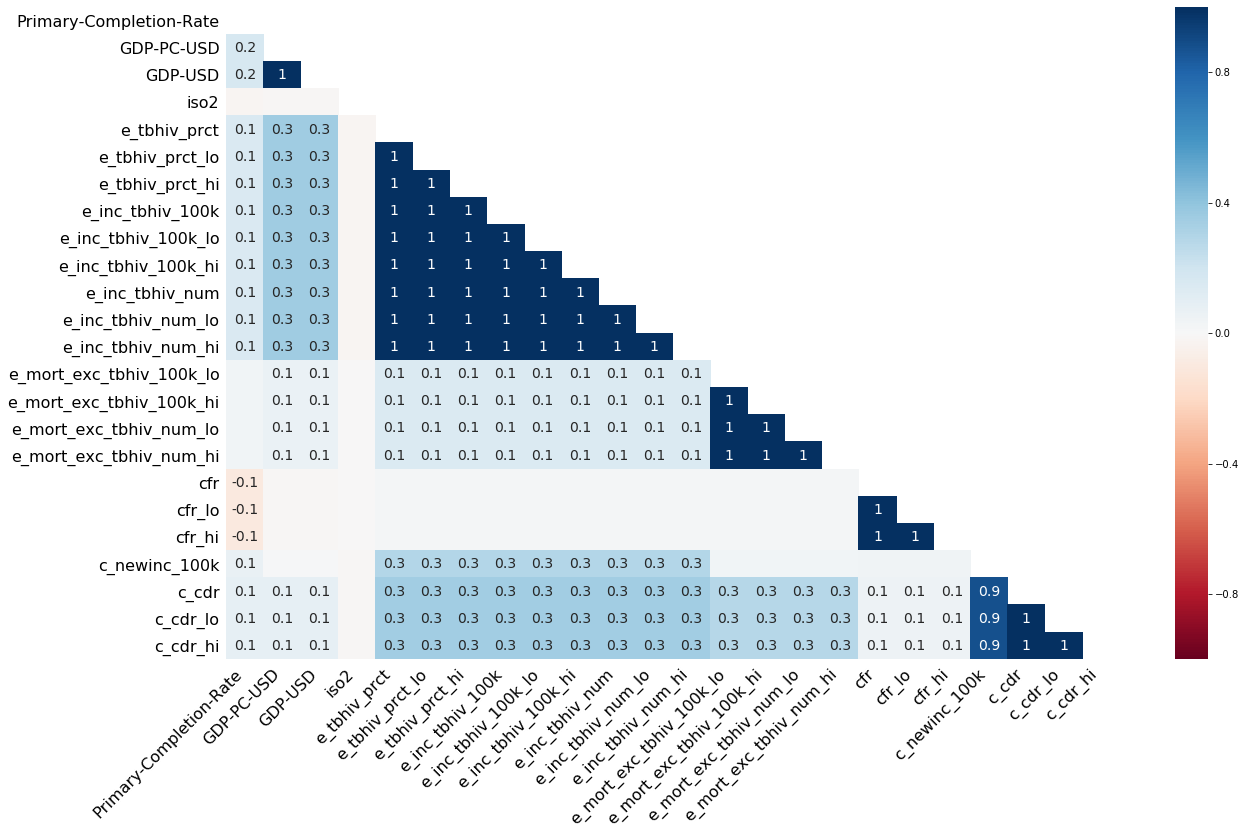

In [24]:
mno.heatmap(merged_df8)

### 2016 subset of second-merge dataframe

In [25]:
is_2016 = merged_df8['Year'] == 2016

In [26]:
merged_df8_2016 = merged_df8[is_2016]

In [27]:
merged_df8_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 3301 to 3509
Data columns (total 53 columns):
Country                     209 non-null object
ISO_Alpha                   209 non-null object
Year                        209 non-null int64
Primary-Completion-Rate     125 non-null float64
GDP-PC-USD                  199 non-null float64
Region                      209 non-null object
IncomeGroup                 209 non-null object
GDP-USD                     199 non-null float64
Country_y                   209 non-null object
iso2                        208 non-null object
iso_numeric                 209 non-null int64
g_whoregion                 209 non-null object
e_pop_num                   209 non-null int64
e_inc_100k                  209 non-null float64
e_inc_100k_lo               209 non-null float64
e_inc_100k_hi               209 non-null float64
e_inc_num                   209 non-null int64
e_inc_num_lo                209 non-null int64
e_inc_num_hi              

#### Pickle merged files

In [28]:
merged_df8_2016.to_pickle('outputs/merged_df8_2016.pickle')
merged_df4.to_pickle('outputs/merged_df4.pickle')
merged_df8.to_pickle('outputs/merged_df8.pickle')

## You finished Notebook 3!

Please proceed to Notebook 4 to see the visualizations.